# PART A:  Landslide_Factors_IRAN

This dataset includes information and factors affecting landslides in Iran. The dataset contains
over 4,000 landslide hazards in Iran, each of which has been characterized by a variety of
factors that may contribute to landslide occurrence. These factors include natural factors such
as slope, climate, tectonic activity, etc., and human factors such as land use, etc. These factors
can have a significant impact on the likelihood of a landslide occurring. For example, slope is
one of the most important natural factors affecting landslides. Note that landslides are more
likely to occur on steep slopes.
1. Use the dataset to generate various insights on landslide occurrences in Iran.


In [1]:
#Importing neccesary libraries and supressing warning messages
import warnings
warnings.filterwarnings('ignore') # Supressing the warning messages
import pandas as pd #Library for loading and Saving CSV, Excel, SQL Data 
import numpy as np #Library for N-dimensional arrays, comprehensive mathematical functions, random number generators, linear algebra routines
import seaborn as sns #visual library for statistical plotting
import matplotlib.pyplot as plt #library  for creating static, animated, and interactive visualizations

In [2]:
Land_Slide=pd.read_csv("C:/Users/HomePC/Desktop/Project Exam Instructions/Landslide_Factors_IRAN.csv")

#view columns in dataset
print('Land_Slide data shape:', Land_Slide.shape)
print(Land_Slide.to_markdown())

Land_Slide data shape: (4295, 15)
|      |   ID |   LONG |    LAT | SUB_Basin                      |   Elevation |   AAP(mm) |   RiverDIST(m) |   FaultDIST(m) | Landuse_Type         |   Slop(Percent) |   Slop(Degrees) | GEO_UNIT   | DES_GEOUNI                                                                                                                                                                                               | Climate_Type   | DES_ClimateType                                                |
|-----:|-----:|-------:|-------:|:-------------------------------|------------:|----------:|---------------:|---------------:|:---------------------|----------------:|----------------:|:-----------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------|:---------------------------------------------------------------

In [3]:
# Checking proper column names land slide data set
print(Land_Slide.columns)

Index(['ID', 'LONG', 'LAT', 'SUB_Basin', 'Elevation', 'AAP(mm)',
       'RiverDIST(m)', 'FaultDIST(m)', 'Landuse_Type', 'Slop(Percent)',
       'Slop(Degrees)', 'GEO_UNIT', 'DES_GEOUNI', 'Climate_Type',
       'DES_ClimateType'],
      dtype='object')


In [4]:
# Checking the variable Data types
Land_Slide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295 entries, 0 to 4294
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4295 non-null   int64  
 1   LONG             4295 non-null   float64
 2   LAT              4295 non-null   float64
 3   SUB_Basin        4295 non-null   object 
 4   Elevation        4295 non-null   float64
 5   AAP(mm)          4295 non-null   int64  
 6   RiverDIST(m)     4295 non-null   float64
 7   FaultDIST(m)     4295 non-null   float64
 8   Landuse_Type     4295 non-null   object 
 9   Slop(Percent)    4295 non-null   float64
 10  Slop(Degrees)    4295 non-null   float64
 11  GEO_UNIT         4295 non-null   object 
 12  DES_GEOUNI       4295 non-null   object 
 13  Climate_Type     4295 non-null   object 
 14  DES_ClimateType  4295 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 503.4+ KB


The dataset has 14 variables and 4295 samples.



#### Cleaning the data

In [5]:
# Removing duplicate rows if any
Land_Slide_Final=Land_Slide.drop_duplicates()
print('Shape After deleting duplicate values:', Land_Slide_Final.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
print(Land_Slide_Final.to_markdown())

Shape After deleting duplicate values: (4295, 15)
|      |   ID |   LONG |    LAT | SUB_Basin                      |   Elevation |   AAP(mm) |   RiverDIST(m) |   FaultDIST(m) | Landuse_Type         |   Slop(Percent) |   Slop(Degrees) | GEO_UNIT   | DES_GEOUNI                                                                                                                                                                                               | Climate_Type   | DES_ClimateType                                                |
|-----:|-----:|-------:|-------:|:-------------------------------|------------:|----------:|---------------:|---------------:|:---------------------|----------------:|----------------:|:-----------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------|:-----------------------------------------------

The data set did not have any duplicates since shape before removing duplicates (4295, 15) is the same as shape after removing duplicates (4295, 15)

In [6]:
#checking for missing data
Land_Slide_Final.isnull().sum()

ID                 0
LONG               0
LAT                0
SUB_Basin          0
Elevation          0
AAP(mm)            0
RiverDIST(m)       0
FaultDIST(m)       0
Landuse_Type       0
Slop(Percent)      0
Slop(Degrees)      0
GEO_UNIT           0
DES_GEOUNI         0
Climate_Type       0
DES_ClimateType    0
dtype: int64

The land slide data does not have any missing data

In [7]:
#Viewing statistical numeric data summary of Land slide data
Land_Slide_Final.describe()

ID         LONG          LAT    Elevation      AAP(mm)  \
count  4295.000000  4295.000000  4295.000000  4295.000000  4295.000000   
mean   2148.000000    50.991609    34.934854  1391.111692   242.166007   
std    1240.004032     3.354156     2.639496   673.859458   136.964710   
min       1.000000    44.302000    26.424000     0.000000    54.000000   
25%    1074.500000    48.433000    32.997500   860.500000   158.000000   
50%    2148.000000    50.499000    36.173000  1552.000000   194.000000   
75%    3221.500000    53.190500    36.864000  1902.500000   270.000000   
max    4295.000000    61.792000    39.293000  3583.000000  1142.000000   

       RiverDIST(m)  FaultDIST(m)  Slop(Percent)  Slop(Degrees)  
count   4295.000000   4295.000000    4295.000000    4295.000000  
mean     809.247705   5464.176909      23.083628      12.684708  
std      974.939030   5920.570823      15.483778       7.976655  
min        0.065920      1.121601       0.000000       0.000000  
25%      208.199375   1314.589467      11.533882       6.579355  
50%      526.187336   3486.626632      20.419369      11.540784  
75%     1116.083961   7701.447471      31.399784      17.432177  
max    25656.226180  44108.087060     100.000000      45.000000

The distribution of the continuous variables is shown above using descriptive statistics

# Graphical resentation of Land Slide Factors in Iran

In [8]:
# Defining a continous variables
num=Land_Slide_Final.select_dtypes(include=["int","float"])

ID's distplot and boxplot graph


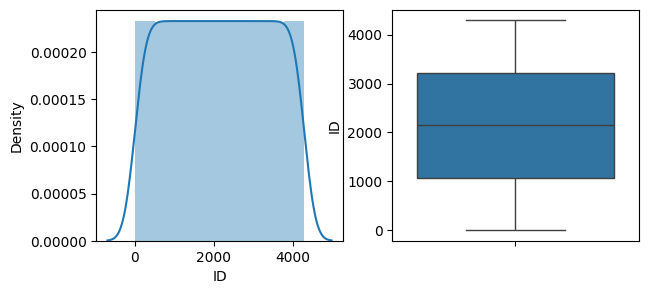

LONG's distplot and boxplot graph


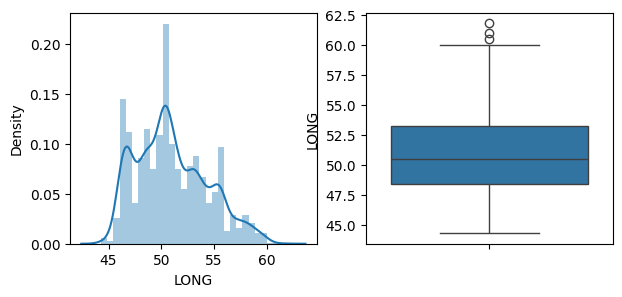

LAT's distplot and boxplot graph


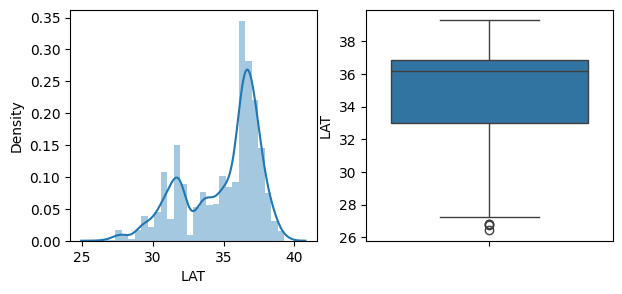

Elevation's distplot and boxplot graph


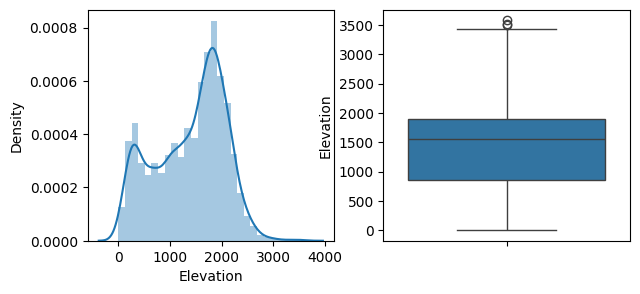

AAP(mm)'s distplot and boxplot graph


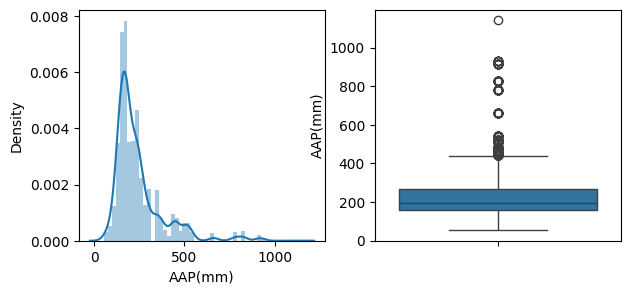

RiverDIST(m)'s distplot and boxplot graph


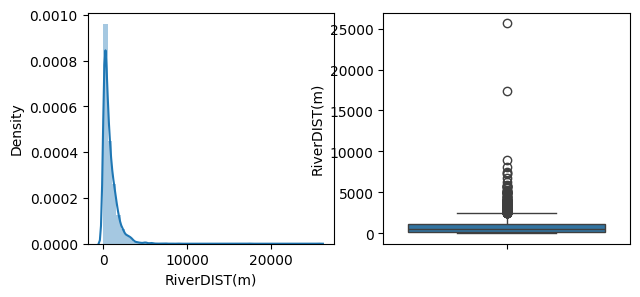

FaultDIST(m)'s distplot and boxplot graph


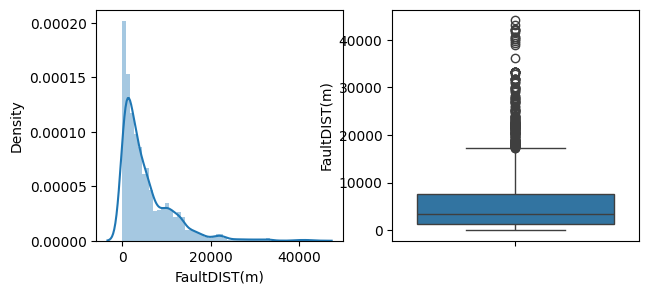

Slop(Percent)'s distplot and boxplot graph


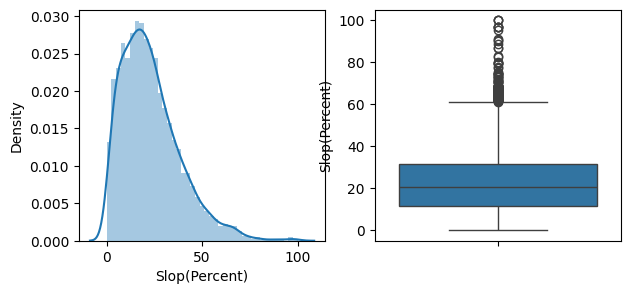

Slop(Degrees)'s distplot and boxplot graph


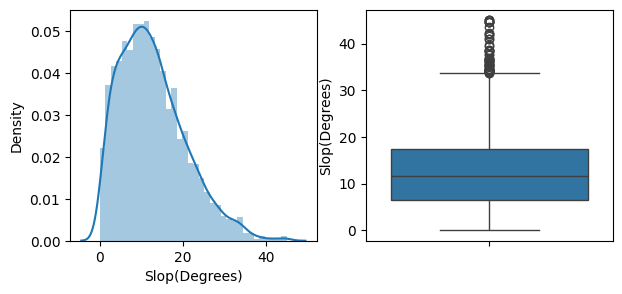

In [9]:
for col in num:
    print(f"{col}'s distplot and boxplot graph")
    plt.figure(figsize=(7,3))
    #distplot
    plt.subplot(1,2,1)
    sns.distplot(num[col])
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(num[col])
    #Lables
    plt.show()

# Obervasations
1. "ID" is a numbering not an actual variable
2. All variables have outliers

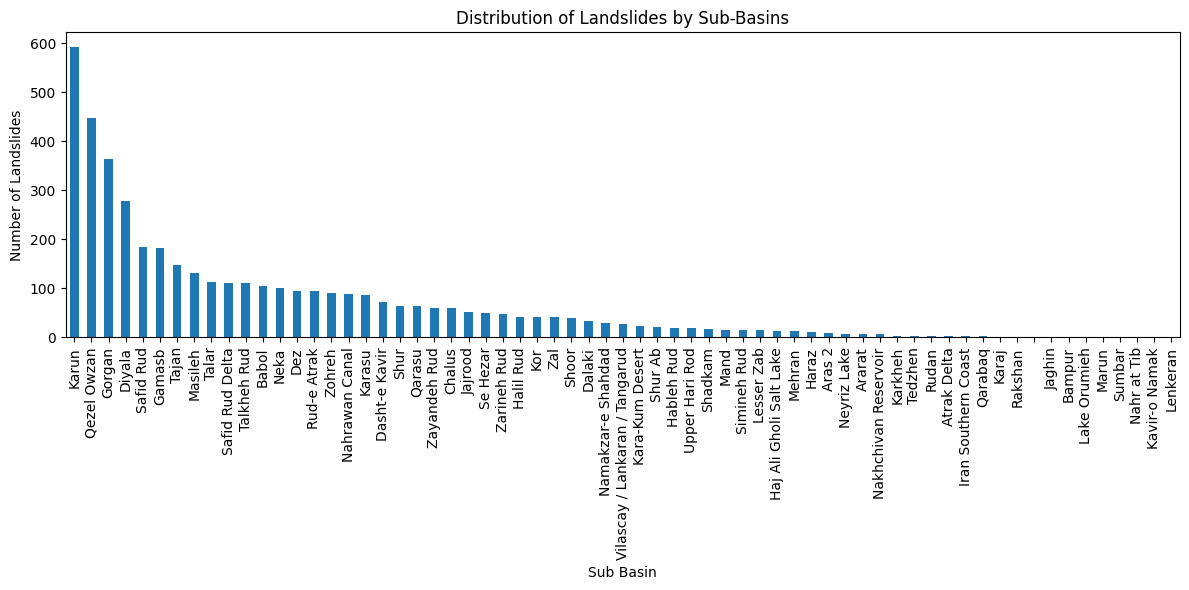

In [10]:
# Count the number of landslides in each Sub basin
SUB_Basin = Land_Slide_Final['SUB_Basin'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
SUB_Basin.plot(kind='bar')
plt.title('Distribution of Landslides by Sub-Basins')
plt.xlabel('Sub Basin')
plt.ylabel('Number of Landslides')
plt.tight_layout()
plt.show()

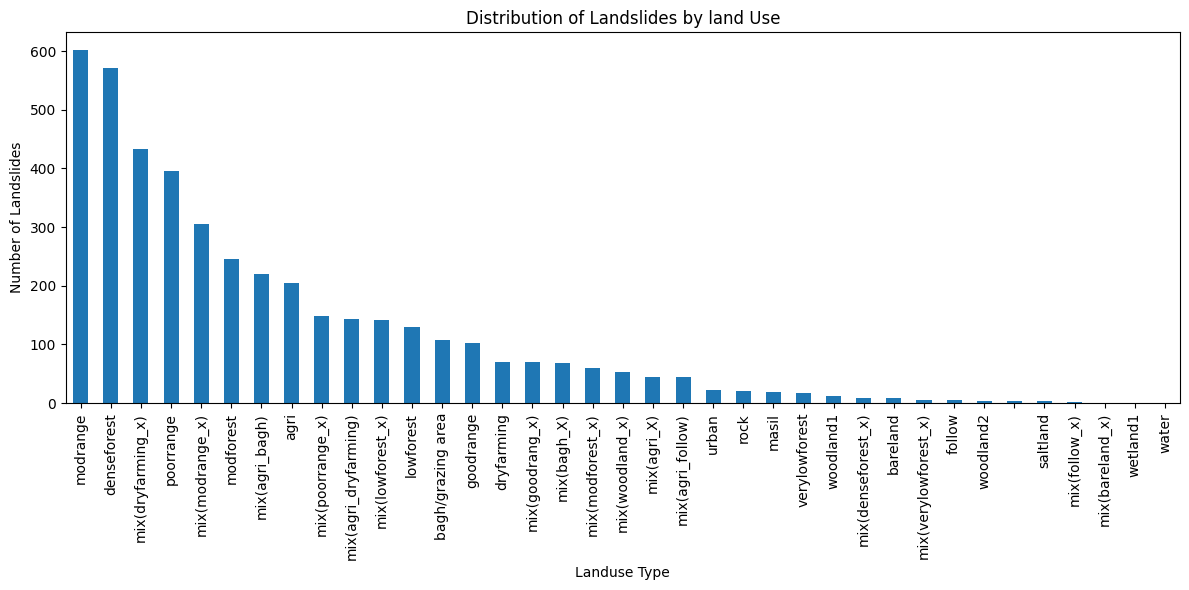

In [11]:
# Count the number of landslides by Land use
Land_Use = Land_Slide_Final['Landuse_Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
Land_Use.plot(kind='bar')
plt.title('Distribution of Landslides by land Use')
plt.xlabel('Landuse Type')
plt.ylabel('Number of Landslides')
plt.tight_layout()
plt.show()

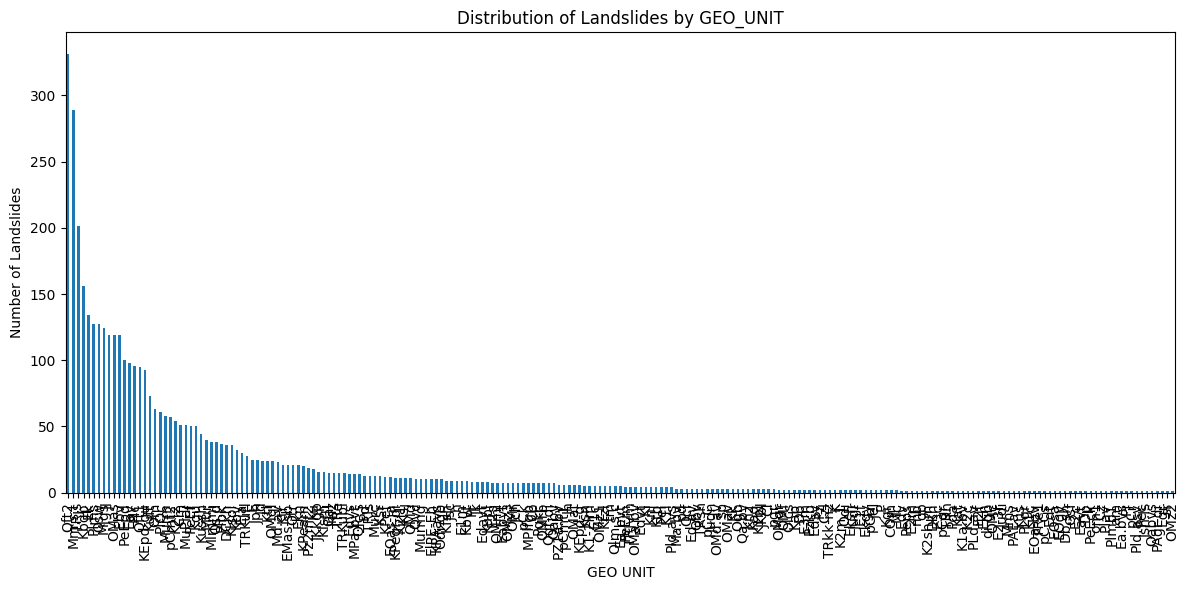

In [12]:
# Count the number of landslides by GEO_UNIT
GEO_UNIT = Land_Slide_Final['GEO_UNIT'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
GEO_UNIT.plot(kind='bar')
plt.title('Distribution of Landslides by GEO_UNIT')
plt.xlabel('GEO UNIT')
plt.ylabel('Number of Landslides')
plt.tight_layout()
plt.show()

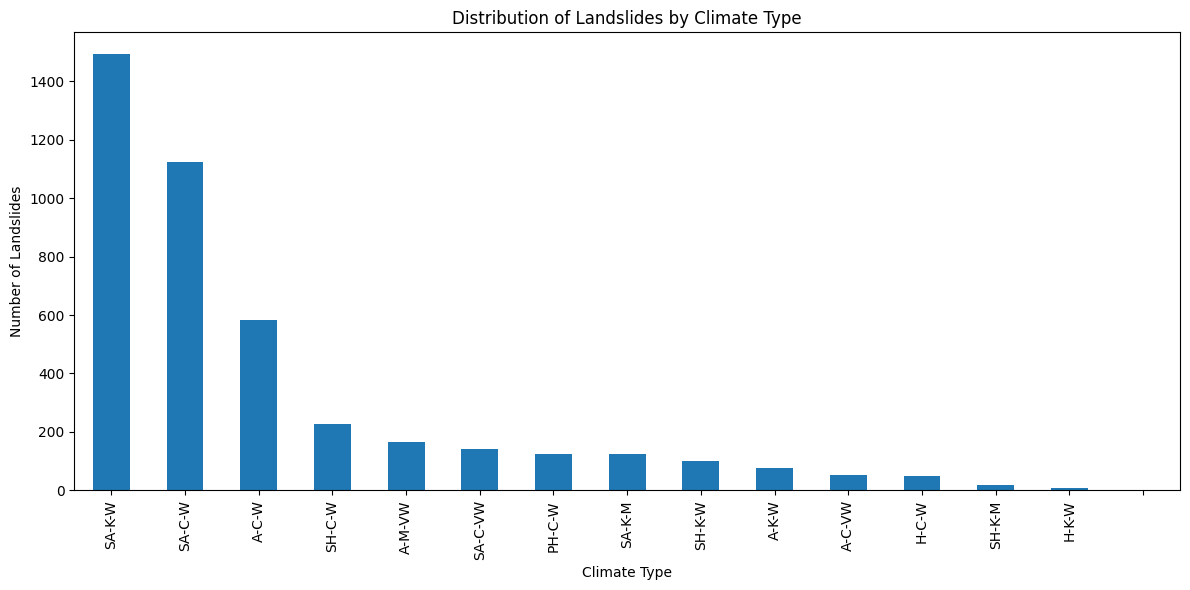

In [13]:
# Count the number of landslides by Climate Type
Climate_Type = Land_Slide_Final['Climate_Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
Climate_Type.plot(kind='bar')
plt.title('Distribution of Landslides by Climate Type')
plt.xlabel('Climate Type')
plt.ylabel('Number of Landslides')
plt.tight_layout()
plt.show()

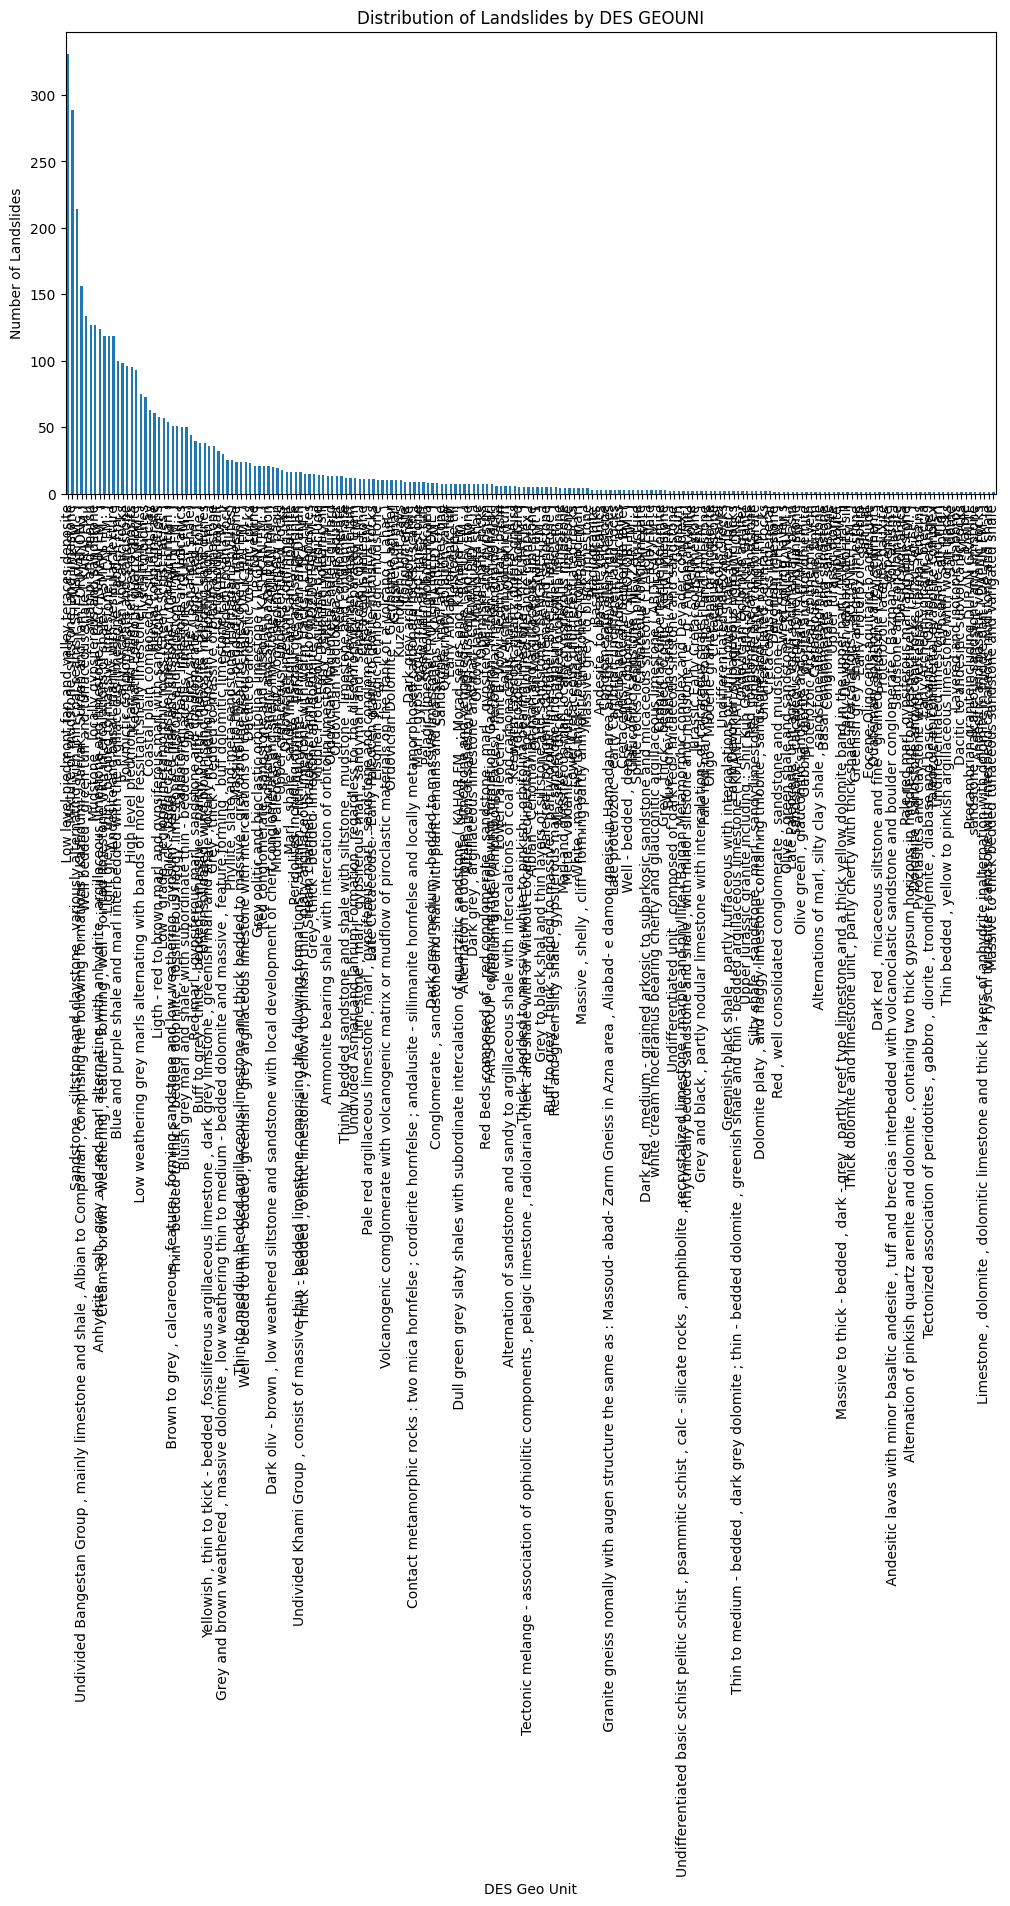

In [14]:
# Count the number of landslides by DES Geo Unit
DES_GEOUNI = Land_Slide_Final['DES_GEOUNI'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
DES_GEOUNI.plot(kind='bar')
plt.title('Distribution of Landslides by DES GEOUNI')
plt.xlabel('DES Geo Unit')
plt.ylabel('Number of Landslides')
plt.tight_layout()
plt.show()

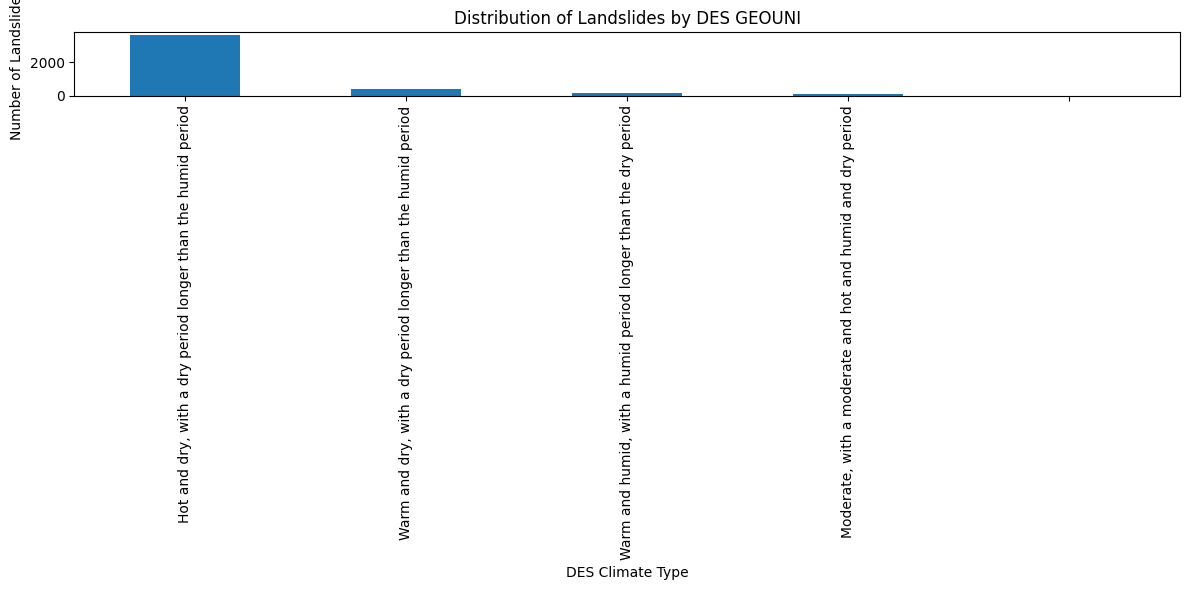

In [15]:
# Count the number of landslides by DES climate Type
DES_ClimateType = Land_Slide_Final['DES_ClimateType'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
DES_ClimateType.plot(kind='bar')
plt.title('Distribution of Landslides by DES GEOUNI')
plt.xlabel('DES Climate Type')
plt.ylabel('Number of Landslides')
plt.tight_layout()
plt.show()

## PART B: [TOTAL 40 MARKS ]
DATASET DESCRIPTION 
(The above dataset provides a comprehensive look at traffic data in a hypothetical urban
setting. It includes over 1.2 million records, each representing a unique snapshot of various
factors influencing traffic conditions in six fictional cities.)
List of Variables:
City: The name of the city
Vehicle type: type of vehicle in use
Weather: Weather conditions at the time of data capture
Economic Condition: Economic state of the city at time of data capture
Day of Week: The day of the week at time of data capture
Hour of Day: The hour of the day at time of data capture
Speed: Recorded speed of the vehicle
Is Peak Hour: Indicator of whether data was captured during peak traffic hours (Not peak hour:
0, Peak hour: 1)
Random Event Occurred: Indicator of whether a random event (like accidents or road closures)
occurred (No random event: 0, random event occurred: 1)
Energy consumption: An estimate of energy consumption based on vehicle type and speed
Traffic Density: The density of traffic at the time of data capture
3
© Uganda Christian University | Exams for Advent 2023 Semester.
Department of Computing & Technology | Faculty of Engineering, Design and Technology
Use the dataset to investigate a range of research objectives;
1. Understanding the traffic density on various days of the week in the urban
environments.
2. Analyzing the impact of various factors like weather, economic conditions,
and vehicle types on traffic density and energy consumption.
3. Developing and testing traffic density prediction algorithms for smart city
solutions. 

In [16]:
# importing necesary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  #To split the dataset into training and testing sets.
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  #A function to calculate the mean squared error, a measure of the prediction accuracy of the model.
from sklearn.ensemble import RandomForestRegressor  #A machine learning model that uses ensemble learning to make predictions.
import warnings
warnings.filterwarnings('ignore') # Supressing the warning messages

In [17]:
#loading Data
Trafic_data=pd.read_csv("C:\\Users\\HomePC\\Desktop\\Project Exam Instructions\\Traffic_Data.csv")

#view columns in dataset
print('Traffic Data:', Trafic_data.shape) #Shape of data set
Trafic_data.head()

Traffic Data: (1219567, 11)


City        Vehicle Type      Weather Economic Condition  \
0  SolarisVille               Drone        Snowy             Stable   
1      AquaCity          Flying Car  Solar Flare          Recession   
2     Neuroburg  Autonomous Vehicle  Solar Flare          Recession   
3     Ecoopolis               Drone        Clear            Booming   
4      AquaCity  Autonomous Vehicle  Solar Flare             Stable   

  Day Of Week  Hour Of Day     Speed  Is Peak Hour  Random Event Occurred  \
0      Sunday           20   29.4268             0                      0   
1   Wednesday            2  118.8000             0                      0   
2   Wednesday           16  100.3904             0                      0   
3    Thursday            8   76.8000             1                      0   
4    Saturday           16   45.2176             0                      0   

   Energy Consumption  Traffic Density  
0             14.7134           0.5241  
1            143.5682           0.3208  
2             91.2640           0.0415  
3             46.0753           0.1811  
4             40.1934           0.4544

In [18]:
# Checking the variable Data types
Trafic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


Cleaning Traffic data

In [19]:
# Removing duplicate rows if any
Trafic_data_Final=Trafic_data.drop_duplicates()
print('Shape After deleting duplicate values:', Trafic_data_Final.shape)

Shape After deleting duplicate values: (1219567, 11)


Trafic data has 11 variables with 1,219,567 unique rows

In [20]:
#checking for missing data
Trafic_data_Final.isnull().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

Trafic data does not have any missing data

In [21]:
#Viewing summary of Traffic Data
Trafic_data_Final.describe(include="all") #Including categorical data

City        Vehicle Type      Weather Economic Condition  \
count     1219567             1219567      1219567            1219567   
unique          6                   4            5                  3   
top     Ecoopolis  Autonomous Vehicle  Solar Flare            Booming   
freq       204179              757454       244237             406684   
mean          NaN                 NaN          NaN                NaN   
std           NaN                 NaN          NaN                NaN   
min           NaN                 NaN          NaN                NaN   
25%           NaN                 NaN          NaN                NaN   
50%           NaN                 NaN          NaN                NaN   
75%           NaN                 NaN          NaN                NaN   
max           NaN                 NaN          NaN                NaN   

       Day Of Week   Hour Of Day         Speed  Is Peak Hour  \
count      1219567  1.219567e+06  1.219567e+06  1.219567e+06   
unique           7           NaN           NaN           NaN   
top        Tuesday           NaN           NaN           NaN   
freq        174783           NaN           NaN           NaN   
mean           NaN  1.150817e+01  5.994476e+01  1.546992e-01   
std            NaN  6.919071e+00  2.663203e+01  3.616178e-01   
min            NaN  0.000000e+00  6.693400e+00  0.000000e+00   
25%            NaN  6.000000e+00  3.753310e+01  0.000000e+00   
50%            NaN  1.200000e+01  5.847110e+01  0.000000e+00   
75%            NaN  1.700000e+01  8.053455e+01  0.000000e+00   
max            NaN  2.300000e+01  1.630886e+02  1.000000e+00   

        Random Event Occurred  Energy Consumption  Traffic Density  
count            1.219567e+06        1.219567e+06     1.219567e+06  
unique                    NaN                 NaN              NaN  
top                       NaN                 NaN              NaN  
freq                      NaN                 NaN              NaN  
mean             4.988738e-02        4.946464e+01     2.770960e-01  
std              2.177123e-01        2.528014e+01     2.191019e-01  
min              0.000000e+00        4.929600e+00     5.900000e-03  
25%              0.000000e+00        2.927395e+01     1.059000e-01  
50%              0.000000e+00        4.578260e+01     2.186000e-01  
75%              0.000000e+00        6.590550e+01     3.960000e-01  
max              1.000000e+00        1.899489e+02     3.377600e+00

In [22]:
# Checking proper column names Trafic Data data set
Trafic_data_Final.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

1. Understanding the traffic density on various days of the week in the urban environments.

In [23]:
# Grouping the data by 'Day Of Week' and calculating the average traffic density for each day
Weekly_Trafic = Trafic_data_Final.groupby("Day Of Week")["Traffic Density"].agg(["mean"],"count").sort_values("mean")
print(Weekly_Trafic)

                 mean
Day Of Week          
Thursday     0.272366
Tuesday      0.272943
Wednesday    0.273143
Monday       0.273950
Friday       0.280504
Sunday       0.283350
Saturday     0.283474


Thursday has the Lowest trafic desinty while Saturday has the highest Trafic Desity during the week

In [24]:
# Grouping the data by 'Day Of Week' and calculating the average traffic density for each day
Hour = Trafic_data_Final.groupby("Hour Of Day")["Traffic Density"].agg(["mean"],"count").sort_values("mean")
print(Hour)

                 mean
Hour Of Day          
16           0.264882
15           0.265894
13           0.268148
14           0.271075
22           0.271556
19           0.271819
10           0.272151
23           0.272486
20           0.273105
11           0.273186
21           0.274475
12           0.277073
1            0.278362
0            0.279036
2            0.279442
4            0.279912
5            0.280407
9            0.280921
3            0.280975
6            0.282603
18           0.283521
17           0.284771
7            0.291232
8            0.293579


The 16th Hour has the Lowest trafic desinty while the 8th has the highest Trafic Desity 

<Figure size 1000x600 with 0 Axes>

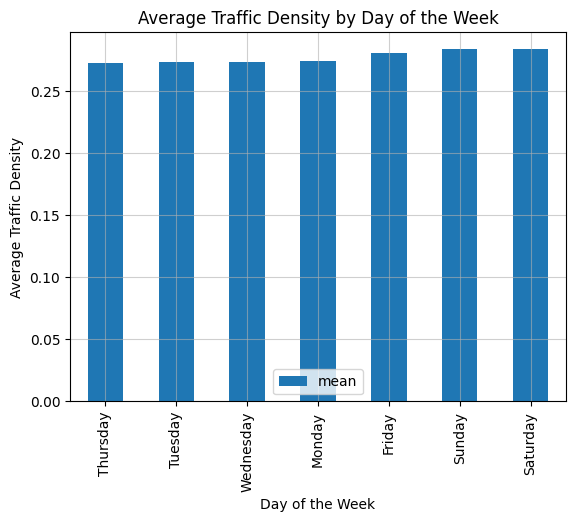

In [25]:
# Am also creating a bar chart for the average traffic density by day of the week
plt.figure(figsize=(10, 6))
Weekly_Trafic.plot(kind='bar')
plt.title('Average Traffic Density by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Density')
plt.grid(True, alpha=0.6)

# Show the plot
plt.show()

2. Analyzing the impact of various factors like weather, economic conditions,
and vehicle types on traffic density and energy consumption.

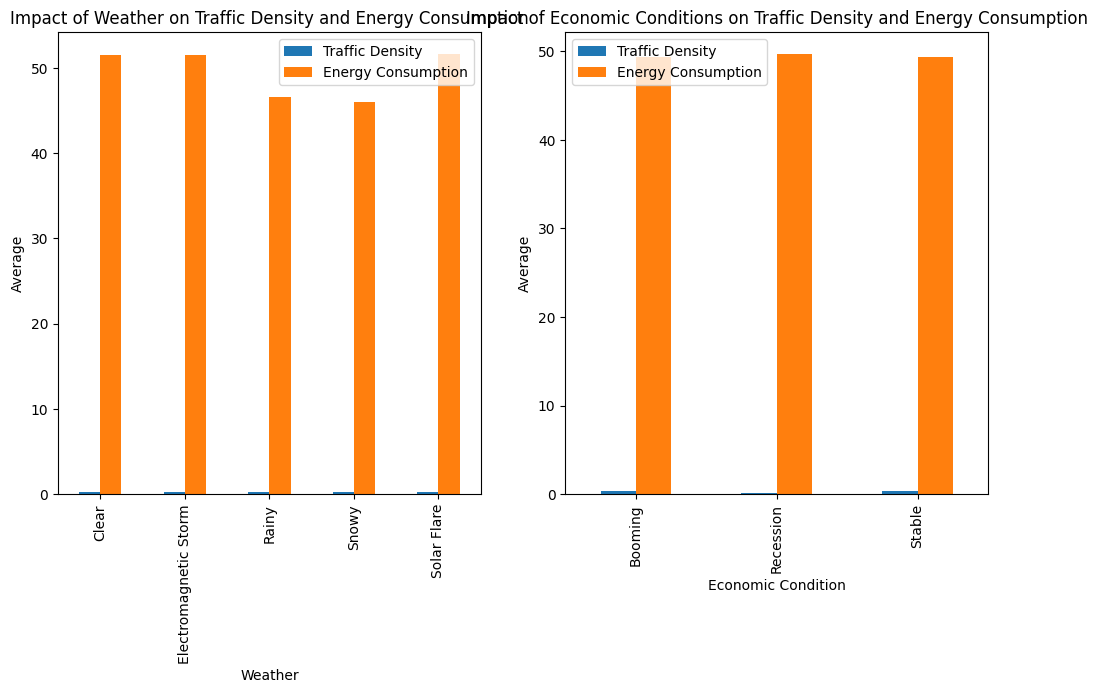

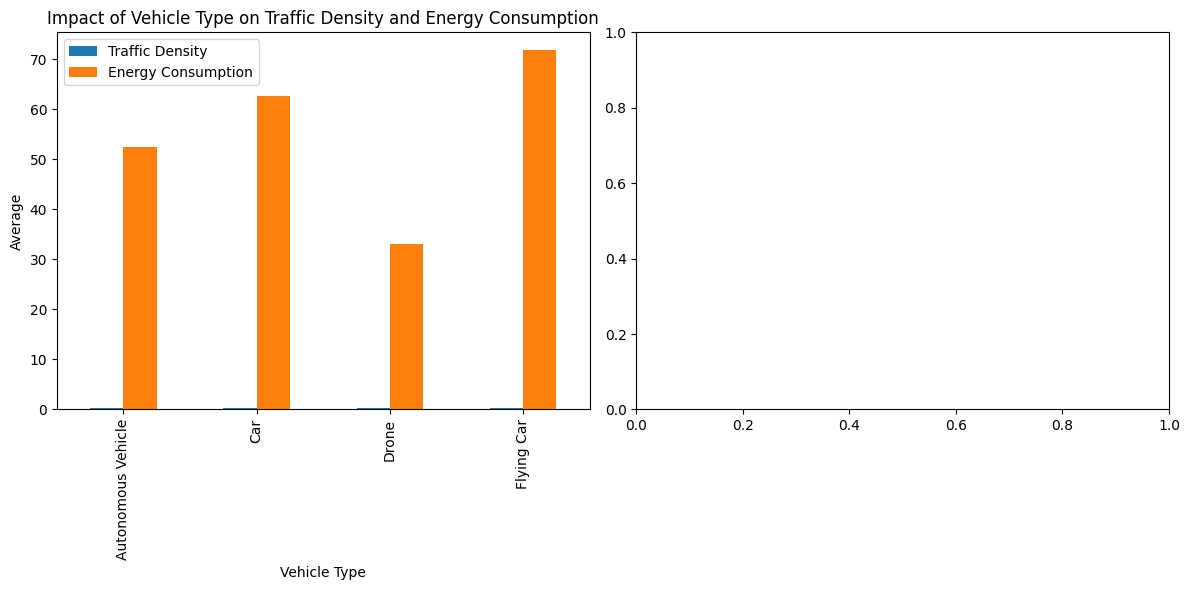

In [26]:

# Analyze the impact of weather on traffic density and energy consumption
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
Trafic_data_Final.groupby('Weather')[['Traffic Density', 'Energy Consumption']].mean().plot(kind='bar', ax=ax1)
ax1.set_title('Impact of Weather on Traffic Density and Energy Consumption')
ax1.set_xlabel('Weather')
ax1.set_ylabel('Average')

# Analyze the impact of economic conditions on traffic density and energy consumption
Trafic_data_Final.groupby('Economic Condition')[['Traffic Density', 'Energy Consumption']].mean().plot(kind='bar', ax=ax2)
ax2.set_title('Impact of Economic Conditions on Traffic Density and Energy Consumption')
ax2.set_xlabel('Economic Condition')
ax2.set_ylabel('Average')

# Analyze the impact of vehicle types on traffic density and energy consumption
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
Trafic_data_Final.groupby('Vehicle Type')[['Traffic Density', 'Energy Consumption']].mean().plot(kind='bar', ax=ax1)
ax1.set_title('Impact of Vehicle Type on Traffic Density and Energy Consumption')
ax1.set_xlabel('Vehicle Type')
ax1.set_ylabel('Average')

# Display the plots
plt.tight_layout()
plt.show()


### 3. Developing and testing traffic density prediction algorithms for smart city solutions.


City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object
Mean Squared Error: 0.042292536194403374
R-squared: 0.12069900233547703


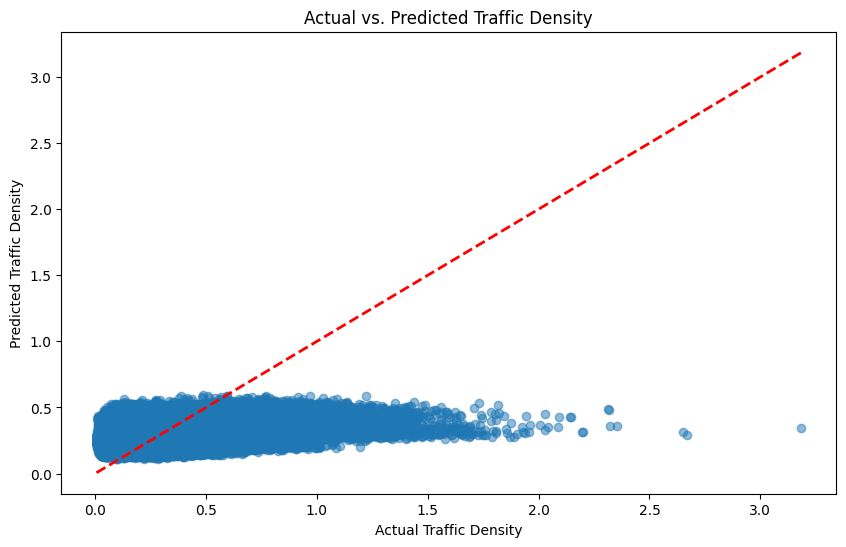

In [27]:

# Explore and prepare the data
print(Trafic_data_Final.dtypes)  # Check the data types of the columns

# Convert the necessary columns to appropriate data types
Trafic_data_Final['Speed'] = Trafic_data_Final['Speed'].astype(float)
Trafic_data_Final['Is Peak Hour'] = Trafic_data_Final['Is Peak Hour'].astype(int)
Trafic_data_Final['Random Event Occurred'] = Trafic_data_Final['Random Event Occurred'].astype(int)
Trafic_data_Final['Traffic Density'] = Trafic_data_Final['Traffic Density'].astype(float)

# Encode the categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Trafic_data_Final['Vehicle Type'] = label_encoder.fit_transform(Trafic_data_Final['Vehicle Type'])
Trafic_data_Final['Weather'] = label_encoder.fit_transform(Trafic_data_Final['Weather'])
Trafic_data_Final['Economic Condition'] = label_encoder.fit_transform(Trafic_data_Final['Economic Condition'])
Trafic_data_Final['Day Of Week'] = label_encoder.fit_transform(Trafic_data_Final['Day Of Week'])
Trafic_data_Final['City'] = label_encoder.fit_transform(Trafic_data_Final['City'])

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X = Trafic_data_Final.drop('Traffic Density', axis=1)
y = Trafic_data_Final['Traffic Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try a multiple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the multiple linear regression model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Plot the actual vs. predicted traffic density
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Traffic Density')
plt.ylabel('Predicted Traffic Density')
plt.title('Actual vs. Predicted Traffic Density')
plt.show()
